# Demo of Cleaning Functions

This notebook has the purpose to showcase (and test!) the functions defined in `cleaning_functions.py`. These functions are designed for cleaning Pandas DataFrames in Python 3.*.

### Load necessary libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import cleaning_functions as clean
import EDA_functions as EDA

# for testing purpose only
import time
# start = time.time()
# print('Duration: {} seconds'.format(time.time() - start))

In [3]:
test_df = pd.read_csv('data/realWorldTestData.csv', low_memory=False, parse_dates=True)

### Have quick look at DataFrame content and structure

In [4]:
EDA.display_tail_transposed(test_df)

(56778, 82)


,56773,56774,56775,56776,56777
car_nr,2.68518e+08,2.68581e+08,2.68916e+08,2.79589e+08,2.87994e+08
ref_dt,2016-04-14 00:00:00.0000000,2016-02-05 00:00:00.0000000,2017-05-09 00:00:00.0000000,2017-06-27 00:00:00.0000000,2016-06-05 00:00:00.0000000
target_event,ACTIVE,ACTIVE,CHURN,CHURN,ACTIVE
NUM_CONSEC_SERVICES,1,1,1,1,1
SUM_INVOICE_AMOUNT_IN_SERVICE,0,1790.55,120,0,1334.7
SUM_INVOICE_AMOUNT,0,4117.35,1955.9,556.8,1484.7
NUM_EVENTS,5,8,9,7,5
FIRST_EVT,2014-06-30 00:00:00.0000000,2014-07-30 00:00:00.0000000,2014-12-02 00:00:00.0000000,2014-10-03 00:00:00.0000000,2014-11-21 00:00:00.0000000
LAST_EVT,2015-06-19 00:00:00.0000000,2015-11-26 00:00:00.0000000,2016-06-30 00:00:00.0000000,2015-09-22 00:00:00.0000000,2015-06-29 00:00:00.0000000
LAST_MILEAGE,25450,49226,11958,44447,15479


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56778 entries, 0 to 56777
Data columns (total 82 columns):
car_nr                           56778 non-null float64
ref_dt                           56778 non-null object
target_event                     56778 non-null object
NUM_CONSEC_SERVICES              56778 non-null int64
SUM_INVOICE_AMOUNT_IN_SERVICE    56778 non-null float64
SUM_INVOICE_AMOUNT               56778 non-null float64
NUM_EVENTS                       56778 non-null int64
FIRST_EVT                        56778 non-null object
LAST_EVT                         56778 non-null object
LAST_MILEAGE                     56777 non-null float64
MEAN_MILEAGE_PER_MNTH            56778 non-null float64
AVG_DIFF_MNTH                    56778 non-null int64
age_mnth                         56778 non-null int64
KANTON_LICENCE_PLATE             55490 non-null object
INSPECTION_INTERVAL_UID          56778 non-null object
LIST_PRICE                       56777 non-null float64
END_CUSTO

In [6]:
# call function to count columns with different datatypes
cleaning_functions.count_dtypes(test_df)

Total number of columns: 82
- Columns with dtype numerical: 42
- Columns with dtype object: 40


### Edit column names

In [7]:
# call function to have more uniform column names
cleaning_functions.edit_column_names(test_df)

,car_nr,ref_dt,target_event,num_consec_services,sum_invoice_amount_in_service,sum_invoice_amount,num_events,first_evt,last_evt,last_mileage,...,fahrzeugart,altersklasse5j,kanton,wemfwirtschaftsgebiet,altersklasse1j,partner_lat,partner_lng,partner_address,dist_metres,dist_seconds
0,13845534.0,2015-09-13 00:00:00.0000000,CHURN,1,0.00,286.45,8,2009-02-23 00:00:00.0000000,2014-04-08 00:00:00.0000000,79790.0,...,0.0,1.0,14.0,42.0,24.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
1,13845535.0,2015-12-02 00:00:00.0000000,ACTIVE,5,0.00,0.00,10,2009-02-24 00:00:00.0000000,2014-08-04 00:00:00.0000000,48670.0,...,6.0,8.0,14.0,42.0,58.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
2,13845526.0,2016-04-06 00:00:00.0000000,CHURN,1,0.00,0.00,5,2009-02-23 00:00:00.0000000,2014-06-06 00:00:00.0000000,53000.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
3,13845518.0,2016-08-08 00:00:00.0000000,CHURN,1,0.00,0.00,6,2009-02-26 00:00:00.0000000,2014-10-13 00:00:00.0000000,49000.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
4,13851980.0,2015-11-29 00:00:00.0000000,CHURN,3,0.00,0.00,14,2009-10-13 00:00:00.0000000,2014-01-29 00:00:00.0000000,56145.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
5,13865425.0,2015-10-08 00:00:00.0000000,ACTIVE,4,0.00,453.75,22,2009-10-09 00:00:00.0000000,2015-06-23 00:00:00.0000000,51481.0,...,6.0,8.0,14.0,42.0,59.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
6,13871676.0,2016-05-15 00:00:00.0000000,ACTIVE,3,0.00,989.45,22,2010-02-28 00:00:00.0000000,2015-12-28 00:00:00.0000000,19188.0,...,6.0,13.0,14.0,42.0,89.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
7,13851438.0,2017-02-06 00:00:00.0000000,ACTIVE,3,0.00,763.00,22,2009-10-13 00:00:00.0000000,2017-01-17 00:00:00.0000000,76475.0,...,0.0,8.0,14.0,42.0,58.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
8,13848336.0,2016-08-02 00:00:00.0000000,CHURN,2,0.00,0.00,9,2009-04-23 00:00:00.0000000,2014-10-02 00:00:00.0000000,131396.0,...,6.0,6.0,14.0,42.0,48.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
9,13871658.0,2016-08-01 00:00:00.0000000,CHURN,3,0.00,0.00,8,2010-02-28 00:00:00.0000000,2014-10-01 00:00:00.0000000,71119.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0


In [8]:
# check
test_df.columns

Index(['car_nr', 'ref_dt', 'target_event', 'num_consec_services',
       'sum_invoice_amount_in_service', 'sum_invoice_amount', 'num_events',
       'first_evt', 'last_evt', 'last_mileage', 'mean_mileage_per_mnth',
       'avg_diff_mnth', 'age_mnth', 'kanton_licence_plate',
       'inspection_interval_uid', 'list_price', 'end_customer_status_uid',
       'accident_car', 'car_brand_uid', 'description_de', 'description_de2',
       'fuel_type_uid', 'gear_type_uid', 'wheel_drive_uid',
       'number_of_doors_uid', 'gear_count', 'exterior_color_de',
       'interior_color_de', 'base_margin', 'budget_type_import', 'sales_type',
       'sales_type_import', 'car_owner_join_nr', 'function_type_uid',
       'person_language_uid', 'title', 'position', 'evt_birth',
       'person_street', 'person_state', 'person_zip_code', 'person_city',
       'person_adress_count', 'ownerage', 'partner_company_nr', 'name',
       'active', 'region_uid', 'sector_uid', 'partner_language_uid',
       'is_retail_pa

### Change datatypes

In [9]:
test_test = test_df.copy()

# assign the columns to be changed to the respective list of column names
cols_to_category = ['fuel_type_uid', 'gear_type_uid']
cols_to_object = ['car_nr']
cols_to_integer = ['sum_invoice_amount_in_service']
cols_to_float = ['avg_diff_mnth']
cols_to_datetime = ['first_evt', 'last_evt']

# call the function
cleaning_functions.change_dtypes(test_df, cols_to_category=cols_to_category, 
                                 cols_to_object=cols_to_object, cols_to_integer=cols_to_integer,
                                 cols_to_float=cols_to_float, cols_to_datetime=cols_to_datetime, 
                                 datetime_pattern='%Y/%m/%d')

,car_nr,ref_dt,target_event,num_consec_services,sum_invoice_amount_in_service,sum_invoice_amount,num_events,first_evt,last_evt,last_mileage,...,fahrzeugart,altersklasse5j,kanton,wemfwirtschaftsgebiet,altersklasse1j,partner_lat,partner_lng,partner_address,dist_metres,dist_seconds
0,13845534.0,2015-09-13 00:00:00.0000000,CHURN,1,0,286.45,8,2009-02-23,2014-04-08,79790.0,...,0.0,1.0,14.0,42.0,24.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
1,13845535.0,2015-12-02 00:00:00.0000000,ACTIVE,5,0,0.00,10,2009-02-24,2014-08-04,48670.0,...,6.0,8.0,14.0,42.0,58.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
2,13845526.0,2016-04-06 00:00:00.0000000,CHURN,1,0,0.00,5,2009-02-23,2014-06-06,53000.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
3,13845518.0,2016-08-08 00:00:00.0000000,CHURN,1,0,0.00,6,2009-02-26,2014-10-13,49000.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
4,13851980.0,2015-11-29 00:00:00.0000000,CHURN,3,0,0.00,14,2009-10-13,2014-01-29,56145.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
5,13865425.0,2015-10-08 00:00:00.0000000,ACTIVE,4,0,453.75,22,2009-10-09,2015-06-23,51481.0,...,6.0,8.0,14.0,42.0,59.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
6,13871676.0,2016-05-15 00:00:00.0000000,ACTIVE,3,0,989.45,22,2010-02-28,2015-12-28,19188.0,...,6.0,13.0,14.0,42.0,89.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
7,13851438.0,2017-02-06 00:00:00.0000000,ACTIVE,3,0,763.00,22,2009-10-13,2017-01-17,76475.0,...,0.0,8.0,14.0,42.0,58.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
8,13848336.0,2016-08-02 00:00:00.0000000,CHURN,2,0,0.00,9,2009-04-23,2014-10-02,131396.0,...,6.0,6.0,14.0,42.0,48.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
9,13871658.0,2016-08-01 00:00:00.0000000,CHURN,3,0,0.00,8,2010-02-28,2014-10-01,71119.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0


In [10]:
# check
cleaning_functions.count_dtypes(test_df)

Total number of columns: 82
- Columns with dtype numerical: 41
- Columns with dtype categorical: 2
- Columns with dtype object: 37
- Columns with dtype datetime: 2


### Delete columns

I like to delete columns in multiple steps during EDA. To have a complete list of all deleted records in the end I proceed as shown in the next few cells.

In [11]:
# assign the columns to be deleted
cols_to_delete = ['EVT_BIRTH', 'NAME']

#call the function
cleaning_functions.delete_columns(test_df, cols_to_delete=cols_to_delete)

,car_nr,ref_dt,target_event,num_consec_services,sum_invoice_amount_in_service,sum_invoice_amount,num_events,first_evt,last_evt,last_mileage,...,fahrzeugart,altersklasse5j,kanton,wemfwirtschaftsgebiet,altersklasse1j,partner_lat,partner_lng,partner_address,dist_metres,dist_seconds
0,13845534.0,2015-09-13 00:00:00.0000000,CHURN,1,0,286.45,8,2009-02-23,2014-04-08,79790.0,...,0.0,1.0,14.0,42.0,24.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
1,13845535.0,2015-12-02 00:00:00.0000000,ACTIVE,5,0,0.00,10,2009-02-24,2014-08-04,48670.0,...,6.0,8.0,14.0,42.0,58.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
2,13845526.0,2016-04-06 00:00:00.0000000,CHURN,1,0,0.00,5,2009-02-23,2014-06-06,53000.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
3,13845518.0,2016-08-08 00:00:00.0000000,CHURN,1,0,0.00,6,2009-02-26,2014-10-13,49000.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
4,13851980.0,2015-11-29 00:00:00.0000000,CHURN,3,0,0.00,14,2009-10-13,2014-01-29,56145.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
5,13865425.0,2015-10-08 00:00:00.0000000,ACTIVE,4,0,453.75,22,2009-10-09,2015-06-23,51481.0,...,6.0,8.0,14.0,42.0,59.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
6,13871676.0,2016-05-15 00:00:00.0000000,ACTIVE,3,0,989.45,22,2010-02-28,2015-12-28,19188.0,...,6.0,13.0,14.0,42.0,89.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
7,13851438.0,2017-02-06 00:00:00.0000000,ACTIVE,3,0,763.00,22,2009-10-13,2017-01-17,76475.0,...,0.0,8.0,14.0,42.0,58.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
8,13848336.0,2016-08-02 00:00:00.0000000,CHURN,2,0,0.00,9,2009-04-23,2014-10-02,131396.0,...,6.0,6.0,14.0,42.0,48.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
9,13871658.0,2016-08-01 00:00:00.0000000,CHURN,3,0,0.00,8,2010-02-28,2014-10-01,71119.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0


In [12]:
# append more columns to delete
for col in ['RATING_UID', 'dist_seconds']:
    cols_to_delete.append(col)

# call the function again
cleaning_functions.delete_columns(test_df, cols_to_delete=cols_to_delete)

'dist_seconds successfully deleted'

,car_nr,ref_dt,target_event,num_consec_services,sum_invoice_amount_in_service,sum_invoice_amount,num_events,first_evt,last_evt,last_mileage,...,haushaltsgroessefein,fahrzeugart,altersklasse5j,kanton,wemfwirtschaftsgebiet,altersklasse1j,partner_lat,partner_lng,partner_address,dist_metres
0,13845534.0,2015-09-13 00:00:00.0000000,CHURN,1,0,286.45,8,2009-02-23,2014-04-08,79790.0,...,1.0,0.0,1.0,14.0,42.0,24.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0
1,13845535.0,2015-12-02 00:00:00.0000000,ACTIVE,5,0,0.00,10,2009-02-24,2014-08-04,48670.0,...,2.0,6.0,8.0,14.0,42.0,58.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0
2,13845526.0,2016-04-06 00:00:00.0000000,CHURN,1,0,0.00,5,2009-02-23,2014-06-06,53000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0
3,13845518.0,2016-08-08 00:00:00.0000000,CHURN,1,0,0.00,6,2009-02-26,2014-10-13,49000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0
4,13851980.0,2015-11-29 00:00:00.0000000,CHURN,3,0,0.00,14,2009-10-13,2014-01-29,56145.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0
5,13865425.0,2015-10-08 00:00:00.0000000,ACTIVE,4,0,453.75,22,2009-10-09,2015-06-23,51481.0,...,4.0,6.0,8.0,14.0,42.0,59.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0
6,13871676.0,2016-05-15 00:00:00.0000000,ACTIVE,3,0,989.45,22,2010-02-28,2015-12-28,19188.0,...,4.0,6.0,13.0,14.0,42.0,89.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0
7,13851438.0,2017-02-06 00:00:00.0000000,ACTIVE,3,0,763.00,22,2009-10-13,2017-01-17,76475.0,...,1.0,0.0,8.0,14.0,42.0,58.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0
8,13848336.0,2016-08-02 00:00:00.0000000,CHURN,2,0,0.00,9,2009-04-23,2014-10-02,131396.0,...,3.0,6.0,6.0,14.0,42.0,48.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0
9,13871658.0,2016-08-01 00:00:00.0000000,CHURN,3,0,0.00,8,2010-02-28,2014-10-01,71119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0


In [13]:
# look at complete list of all deleted columns
cols_to_delete

['EVT_BIRTH', 'NAME', 'RATING_UID', 'dist_seconds']

In [14]:
#test
test_df.shape[1]

82

### Handle Missing Values

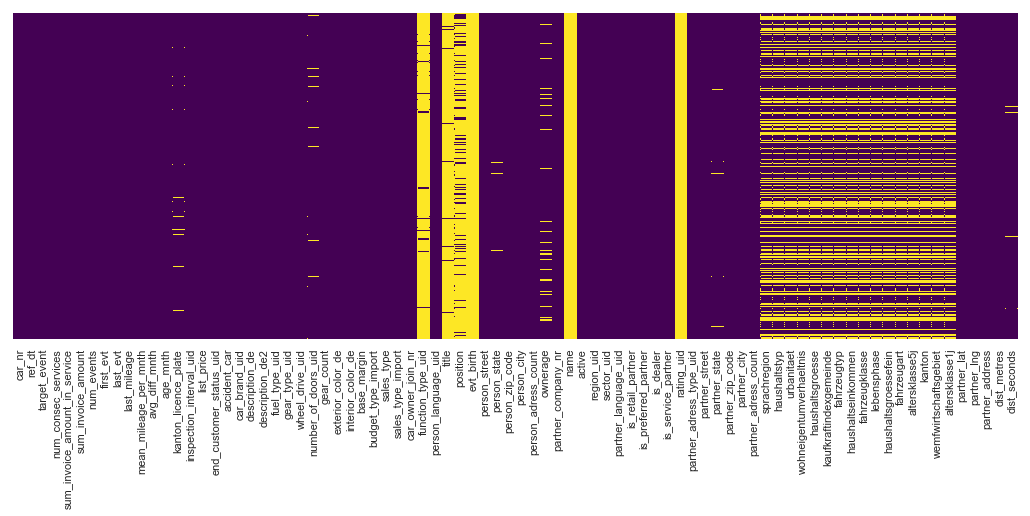

In [15]:
# call function to plot with heatmap showing missing values
cleaning_functions.plot_NaN(test_df)

In [16]:
# call function to show columns containing missing values und respective number of them
cleaning_functions.list_NaN(test_df)

Number of NaN per column:
last_mileage: 1 (0.00%)
kanton_licence_plate: 1288 (0.02%)
list_price: 1 (0.00%)
end_customer_status_uid: 1 (0.00%)
description_de: 1 (0.00%)
fuel_type_uid: 1 (0.00%)
gear_type_uid: 1 (0.00%)
wheel_drive_uid: 1 (0.00%)
number_of_doors_uid: 1171 (0.02%)
gear_count: 1 (0.00%)
exterior_color_de: 4 (0.00%)
interior_color_de: 5 (0.00%)
base_margin: 1 (0.00%)
function_type_uid: 54328 (0.96%)
title: 55125 (0.97%)
position: 45037 (0.79%)
evt_birth: 56778 (1.00%)
person_street: 171 (0.00%)
person_state: 649 (0.01%)
ownerage: 5117 (0.09%)
name: 56778 (1.00%)
rating_uid: 56778 (1.00%)
partner_state: 408 (0.01%)
sprachregion: 18413 (0.32%)
haushaltstyp: 18413 (0.32%)
urbanitaet: 18413 (0.32%)
wohneigentumverhaeltnis: 18413 (0.32%)
haushaltsgroesse: 18413 (0.32%)
kaufkraftindexgemeinde: 18413 (0.32%)
fahrzeugtyp: 18413 (0.32%)
haushaltseinkommen: 18413 (0.32%)
fahrzeugklasse: 18413 (0.32%)
lebensphase: 18413 (0.32%)
haushaltsgroessefein: 18413 (0.32%)
fahrzeugart: 18414 (0